# Dictionary generator
Here I'd try to make a big dictionary  

In [3]:
import re
import datetime

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data

## English word-Chinese character dictionary
English-Chinese dictionary is taken from https://www.mdbg.net/chinese/dictionary?page=cedict

Format of the dictionary line:

```
Traditional Simplified [pin1 yin1] /English equivalent 1/equivalent 2/

```

Example of the line:
```
雀鳥 雀鸟 [que4 niao3] /bird/
```

One word to one character dictionary

In [4]:
word2hier = dict()
for line in open('data/cedict_ts.u8', 'r', encoding='utf-8'):
    if re.match(r'#.*', line):
#   Skip comments
        continue
    
    ch_trad, ch_simp, line = re.split(r' ', line, maxsplit=2)
#   We use simplified characters
    ch = ch_simp
    
    if not re.match(u'[\u4e00-\u9fff]\Z', ch):
#   Skip if ch contains more than one character
        continue
    
    _, eng_eqs = re.split(r'] /', line, maxsplit=1)
    eng_eqs = eng_eqs.split('/')[:-1]
    
#   Select only equivalents containing only one word
    eng_eqs = [eq for eq in eng_eqs if re.match(r'\w+\Z', eq)]
    
    for eng_eq in eng_eqs:
        word2hier[eng_eq] = ch

In [5]:
len(word2hier.keys())

4795

## Generate images from unicode srtings

In [14]:
def draw_char(ch, size=64, bw=False):
    img = Image.new("RGB",[size,size], "black")
    
    font = ImageFont.truetype('data/CODE2000.TTF', size, encoding="unic")
    ImageDraw.Draw(img).text((0, -size * 0.125), ch, fill="white", font=font)
    
    img = np.asarray(img)
    bwing = np.zeros((img.shape[0], img.shape[1]))

    if bw:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j, 0] > 0:
                    bwing[i, j] = 1
    else:        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    bwing[i, j] = img[i, j, 0]
    img = bwing    
    return img

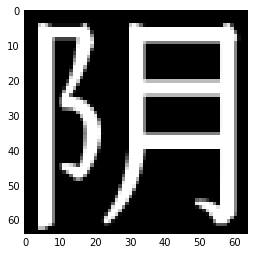

In [15]:
plt.imshow(draw_char(word2hier["moon"]), cmap = plt.get_cmap('gray'), interpolation="nearest")
plt.show()

## Reading word2vec
word2vec set is taken from http://nlp.stanford.edu/data/glove.42B.300d.zip

Containes pre-trained 300-dimensional vectors trained on Common Crawl (42B) dataset

In [113]:
word2vec = {}

lcount = 0
wcount = 0

for line in open('./data/glove.42B.300d.txt', 'r', encoding='utf-8'):
    word, vect = line.split(" ", maxsplit=1)
    
    if word in word2hier.keys():
        wcount += 1
        vect = [float(n) for n in vect[:-1].split(" ")]
        word2vec[word] = vect
    
    lcount += 1
    if (lcount % 10000 == 0):
        print("{} lines read, {} words found".format(lcount, wcount))
       
print("{} lines read, {} words found".format(lcount, wcount))

10000 lines read, 2380 words found
20000 lines read, 3146 words found
30000 lines read, 3611 words found
40000 lines read, 3896 words found
50000 lines read, 4061 words found
60000 lines read, 4205 words found
70000 lines read, 4290 words found
80000 lines read, 4351 words found
90000 lines read, 4404 words found
100000 lines read, 4438 words found
110000 lines read, 4477 words found
120000 lines read, 4496 words found
130000 lines read, 4515 words found
140000 lines read, 4535 words found
150000 lines read, 4554 words found
160000 lines read, 4561 words found
170000 lines read, 4571 words found
180000 lines read, 4580 words found
190000 lines read, 4587 words found
200000 lines read, 4594 words found
210000 lines read, 4600 words found
220000 lines read, 4604 words found
230000 lines read, 4610 words found
240000 lines read, 4614 words found
250000 lines read, 4619 words found
260000 lines read, 4625 words found
270000 lines read, 4630 words found
280000 lines read, 4632 words found
2

## Compose word to vector and character dictionary

In [148]:
char_size = 64

word2vec_char = {}
wcount = 0

for key in word2vec:
    word2vec_char[key] = {"vect": word2vec[key], "char": draw_char(word2hier[key], size=char_size).ravel()}
    
    wcount += 1
    if (wcount % 1000 == 0):
        print("{} words processed".format(wcount))
        
print("{} words processed".format(wcount))

1000 words processed
2000 words processed
3000 words processed
4000 words processed
4706 words processed


# Write everything

In [154]:
timestamp = datetime.datetime.now().strftime("%d_%m_%y_%H_%m_%S")
filename = "./data/word2_{}_vector2_{}x{}hier_{}.txt".format(len(word2vec["cat"]), 
                                                            char_size, char_size, 
                                                            timestamp)
print("writing to file: {}".format(filename))
fld = open(filename, 'w')

lcount = 0
for key in word2vec_char:
    
    vector = " ".join([str(n) for n in word2vec_char[key]["vect"]])
    image = " ".join([str(n) for n in word2vec_char[key]["char"]])
    try:
        fld.write("{},{},{}\n".format(key, vector, image))
    except:
        print(key)
    
    lcount +=1
    if (lcount % 1000 == 0):
        print("{} lines wrote".format(lcount))
        
fld.close()
print("{} lines wrote".format(lcount))

writing to file: ./data/word2_300_vector2_64x64hier_13_11_17_12_11_00.txt
corvée
1000 lines wrote
2000 lines wrote
3000 lines wrote
4000 lines wrote
4706 lines wrote


# An attempt to generate more Data

## English words collocation-Chinese character dictionary

In [12]:
coll2hier = dict()
for line in open('data/cedict_ts.u8', 'r', encoding='utf-8'):
    if re.match(r'#.*', line):
#   Skip comments
        continue
    
    ch_trad, ch_simp, line = re.split(r' ', line, maxsplit=2)
#   We use simplified characters
    ch = ch_simp
    
    if not re.match(u'[\u4e00-\u9fff]\Z', ch):
#   Skip if ch contains more than one character
        continue
    
    _, eng_eqs = re.split(r'] /', line, maxsplit=1)
    eng_eqs = eng_eqs.split('/')[:-1]
    
#   Select only equivalents containing only one word
    eng_eqs = [eq for eq in eng_eqs if re.match(r'(\w+\s)*\w+\Z', eq)]
    
    for eng_eq in eng_eqs:
        coll2hier[eng_eq] = ch

In [13]:
len(coll2hier)

11919

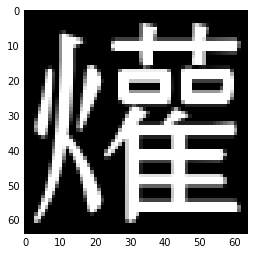

In [17]:
plt.imshow(draw_char(coll2hier["light a fire"]), cmap = plt.get_cmap('gray'), interpolation="nearest")
plt.show()